In [207]:
# using Pkg
# Pkg.add(url="https://github.com/MasanoriKanamaru/Astroshaper")
# Pkg.update("Astroshaper")
# Pkg.test("Astroshaper")

In [194]:
# using Plots
# using FileIO
# using JLD2
# using Profile

In [3]:
using Revise
using Astroshaper

In [4]:
ENV["COLUMNS"] = 1000
ENV["LINES"] = 20;

In [5]:
shapedir = "/Users/masanorikanamaru/Documents/shape/ryugu"

shapename = "ryugu_v252_f500.obj"
# shapename = "ryugu_v752_f1500.obj"
# shapename = "ryugu_test.obj"

# shapename = "SHAPE_SPC_49k_v20190802.obj"
# shapename = "SHAPE_SPC_200k_v20190802.obj"
# shapename = "SHAPE_SPC_800k_v20190802.obj"
# shapename = "SHAPE_SPC_3M_v20190802.obj"

# shapename = "SHAPE_SFM_49k_v20180804.obj"
# shapename = "SHAPE_SPC_49k_v20200323.obj"
# shapename = "SHAPE_SPC_3M_v20200323.obj"

shapepath = joinpath(shapedir, shapename)
@show shapepath;

shapepath = "/Users/masanorikanamaru/Documents/shape/ryugu/ryugu_v252_f500.obj"


In [6]:
# shapepath = splitext(shapepath)[1] * ".jld2"

In [7]:
shape = ShapeModel(shapepath; scale=1000, find_visible_facets=true, save_shape=false)

Shape model
-----------
Nodes             : 252
Faces             : 500
Surface area      : 2.6740222482370236e6
Volume            : 3.759699719284749e8
Equivalent radius : 447.7354864412234
Center-of-Figure  : [0.37115829680556717, 0.14301318037402377, 0.02972401268611568]
Inertia tensor    : 
    | Ixx Ixy Ixz |   [0.0, 0.0, 0.0]
    | Iyx Iyy Iyz | = [0.0, 0.0, 0.0]
    | Izx Izy Izz |   [0.0, 0.0, 0.0]


In [8]:
# draw(shape)
# draw(shape, data=:radius)
# draw(shape, data=:temperature)
# draw(shape; data=:illumination, r̂☉=[1,0,0.])
# draw(shape, data=[center[3] for center in shape.facets.center])

In [15]:
orbit = OrbitalElements(RYUGU)

--------------------
  Orbital elements  
--------------------
    Semi-mojor axis         : a  = 1.18956373 [AU]
    Eccentricity            : e  = 0.19027921 [-]
    Lon. of ascending node  : Ω  = 251.589203 [deg]
    Argument of periapsis   : ω  = 211.435963 [deg]
    Inclination             : I  = 5.8840222 [deg]
    Periapsis passage time  : tₚ = -2.4948038004043424e6 [sec]
    Mean anomaly            : Φ  = 21.9353799 [deg]
--------------------
  Other parameters  
--------------------
    Gravitational parameter : μ = 1.32712440018e20 [m^3/s^2]
    Mean motion             : n = 0.7596656791419168 [deg/day]
    Orbital period          : P = 473.8926739544681 [day]
------------------
  Time-variables  
------------------
    Time                    : t  = 0.0 [sec]
    Eccentric anomaly       : u  = 26.861352366162944 [deg]
    True anomaly            : ν  = 32.29438904892344 [deg]
    Position                : r  = [1.2489380713478127e11, 7.893746967835626e10, 0.0] [m]
    Veloci

In [10]:
spin = SpinParams(RYUGU, orbit)

-------------------
  Spin parameters  
-------------------
Right ascension (RA) : α = 96.4 [deg]
Declination (Dec)    : δ = -66.4 [deg]
Ecliptic longitude   : λ = 179.33757188938182 [deg]
Ecliptic latitude    : β = -87.44207056697601 [deg]
Obliquity            : ε = 171.65664649001607 [deg]
Spin period          : P = 7.63262 [hours]
Spin rate            : ω = 0.00022866712242903872 [rad/sec]
Vernal equinox lon.  : γ = 154.3323208882217 [deg]
                           (longitude from the periheion direction)
Time                 : t  = 0.0 [sec]
Initial spin phase   : ϕ₀ = 0.0 [deg]
Spin phase           : ϕ  = 0.0 [deg]


# Thermophysical Model

In [11]:
thermo_params = ThermoParams(
    A_B   = 0.04,
    A_TH  = 0.0,
    k     = 0.1,
    ρ     = 1270.0,
    Cp    = 600.0,
    ϵ     = 1.,
    t_bgn = 0.0,
    t_end = spin.P * 10,
    Nt    = 721,
    z_max = 0.6,
    Nz    = 41,
    P     = spin.P,
);

In [13]:
# savepath = "tmp.jld2"
@time timestamp = run_TPM(shape, orbit, spin, thermo_params)

  0.280710 seconds (140.58 k allocations: 12.344 MiB)


,t,u,ν,ϕ,f_x,f_y,f_z,τ_x,τ_y,τ_z,E_in,E_out,E_cons,Ē_cons
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.468819,0.563643,0.0,9.92025e-6,4.44963e-6,6.01218e-7,-0.000416175,0.000149287,-0.000183821,8.38911e8,0.0,0.0,0.0
2,381.631,0.46889,0.563727,0.0872665,0.0251434,0.0132682,-0.00181507,0.37064,-0.618929,-0.19855,8.3566e8,1.68572e7,0.0201723,0.0100862
3,763.262,0.46896,0.56381,0.174533,0.0510587,0.025989,-0.00369733,0.70619,-1.15349,-0.382106,8.34888e8,3.4082e7,0.0408222,0.0203315
4,1144.89,0.469031,0.563894,0.261799,0.0787493,0.0381852,-0.00567068,1.03461,-1.65732,-0.55864,8.35013e8,5.22418e7,0.062564,0.0308896
5,1526.52,0.469101,0.563977,0.349066,0.106405,0.0487858,-0.00763911,1.35364,-2.10314,-0.708673,8.34828e8,7.00753e7,0.0839398,0.0414997
6,1908.15,0.469172,0.56406,0.436332,0.133083,0.057346,-0.00956968,1.67198,-2.49911,-0.831672,8.33457e8,8.69602e7,0.104337,0.0519725
7,2289.79,0.469242,0.564144,0.523599,0.158207,0.0637697,-0.0114638,1.99403,-2.86807,-0.930422,8.38661e8,1.02548e8,0.122276,0.0620158
8,2671.42,0.469313,0.564227,0.610865,0.181472,0.0679746,-0.0133198,2.29748,-3.2293,-1.03886,8.41196e8,1.16765e8,0.138809,0.071615
9,3053.05,0.469383,0.564311,0.698132,0.202615,0.0702689,-0.0151363,2.57798,-3.60047,-1.1569,8.43099e8,1.29508e8,0.153609,0.0807254


In [14]:
Astroshaper.describe(timestamp)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,t,1.37387e5,0.0,1.37387e5,2.74774e5,0,Float64
2,u,0.494167,0.468819,0.494179,0.519469,0,Float64
3,ν,0.593563,0.563643,0.59359,0.623373,0,Float64
4,ϕ,31.4159,0.0,31.4159,62.8319,0,Float64
5,f_x,0.555033,9.92025e-6,0.588482,0.642349,0,Float64
6,f_y,0.152681,4.44963e-6,0.161908,0.218619,0,Float64
7,f_z,-0.0679187,-0.102933,-0.0737024,6.01218e-7,0,Float64
8,τ_x,2.37387,-1.18597,2.24983,6.10219,0,Float64
9,τ_y,-8.24232,-11.2672,-8.11157,0.000149287,0,Float64


In [15]:
# timestamp = Astroshaper.jldopen("tmp.jld2", "r") do file
#     file["timestamp"]
# end

In [16]:
C = 4.039541372643629e16
YORP = analyze_YORP(timestamp, spin, C)

@show shapename
@show YORP.τ̄
@show YORP.ω̇, YORP.ωε̇, YORP.ωψ̇
@show YORP_timescale(YORP.ω̇, 3.5, 7.63262);  # 3.5時間から7.6時間まで減速する時間スケール [yr]

shapename = "ryugu_v252_f500.obj"
YORP.τ̄ = [2.3738664859828864, -8.242316607010164, -0.7373578467947709]
(YORP.ω̇, YORP.ωε̇, YORP.ωψ̇) = (-2.1094055215113005e-6, 6.81872181819457e-5, 6.045574839209872e-5)
YORP_timescale(YORP.ω̇, 3.5, 7.63262) = 1.7347912669031378e6


In [ ]:
function analyze_YORP(df, spin, MOI)
    τ̄ = [mean(df.τ_x), mean(df.τ_y), mean(df.τ_z)]

    τ̄_ω = τ̄ ⋅ spin.ŝ
    τ̄_ε = τ̄ ⋅ spin_perp_unit1(spin)
    τ̄_ψ = τ̄ ⋅ spin_perp_unit2(spin)

    ## [rad/sec/sec]
    ω̇  = τ̄_ω / MOI
    ωε̇ = τ̄_ε / MOI
    ωψ̇ = τ̄_ψ / MOI

    ## [deg/day/day]
    ω̇  = rad2deg(ω̇)  * (3600*24)^2
    ωε̇ = rad2deg(ωε̇) * (3600*24)^2
    ωψ̇ = rad2deg(ωψ̇) * (3600*24)^2

    (τ̄ = τ̄, τ̄_ω = τ̄_ω, τ̄_ε = τ̄_ε, τ̄_ψ = τ̄_ψ, ω̇ = ω̇, ωε̇ = ωε̇, ωψ̇ = ωψ̇)
end

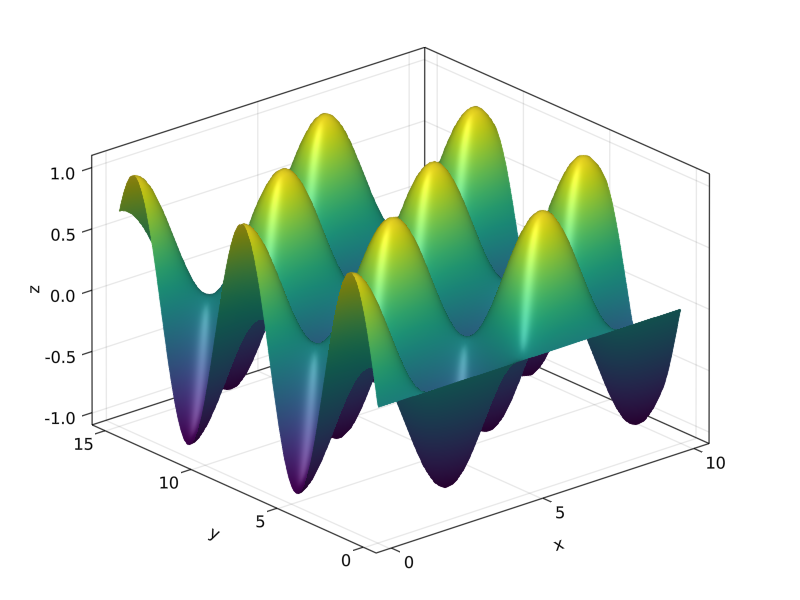

In [30]:
using GLMakie

xs = LinRange(0, 10, 100)
ys = LinRange(0, 15, 100)
zs = [cos(x) * sin(y) for x in xs, y in ys]

surface(xs, ys, zs, axis=(type=Axis3,))

In [23]:
r = 0.437  # Crater rim radius
h = 0.313  # Crater depth
R = crater_curvature_radius(r, h)

S = h / 2R  # Crater depth to curvature diameter ratio

println("Crater rim radius                 : r = ", r)
println("Crater depth                      : h = ", h)
println("Crater curvature radius           : R = ", R)
println("Depth to curvature diameter ratio : S = ", S)

xs, ys, zs = concave_spherical_segment(r, h)

scene = surface(xs, ys, zs)
wireframe!(xs, ys, zs)
display(scene)

Crater rim radius                 : r = 0.437
Crater depth                      : h = 0.313
Crater curvature radius           : R = 0.46156230031948886
Depth to curvature diameter ratio : S = 0.3390658203490022


GLMakie.Screen(...)

In [24]:
Ct = 0.04912
N_trench = 3

xs, ys, zs = parallel_sinusoidal_trenches(Ct, N_trench)

scene = surface(xs, ys, zs)
wireframe!(xs, ys, zs)
display(scene)

GLMakie.Screen(...)

In [25]:
function random_Gaussians(C; Nx=2^5, Ny=2^5)
    xs = LinRange(-1, 1, Nx + 1)
    ys = LinRange(-1, 1, Ny + 1)
    zs = zeros(length(xs), length(ys))

    for _ in 1:100
        A = C * (2*rand() - 1)
        σ = 2.25 + 0.75 * rand()
        x₀ = (2*rand() - 1)
        y₀ = (2*rand() - 1)

        σ² = σ^2
        # d² = [(x - x₀)^2 + (y - y₀)^2 for x in xs, y in ys]  # Distance from the Gaussian center
        # @. zs += A / (2π * σ²) * exp(- d² / 2σ²)
        zs .+= [A / (2π * σ²) * exp(- ((x - x₀)^2 + (y - y₀)^2) / 2σ²) for x in xs, y in ys]
        println(A / (2π * σ²))
    end
    xs, ys, zs
end

random_Gaussians (generic function with 1 method)

In [26]:
Nx = 2^5
Ny = 2^5

C = 0.65

xs, ys, zs = random_Gaussians(C; Nx=2^5, Ny=2^5)

scene = surface(xs, ys, zs)
wireframe!(xs, ys, zs*100)
display(scene)

0.0010586880415645666
0.012911032367315509
0.006612984234369071
0.011253165271947566
0.003230706375786304
-0.007951268216186197
0.008879228496348226
0.008128829384010917
-0.006390868436095063
-0.0027521439974408147
0.004135584698020282
-0.011652840104127388
-0.004140193726893497
0.009394974849996735
-0.007116127605202313
0.014440486841527995
-0.008205419573446338
0.012855769034262969
0.0062279094081504486
-0.001582624794366738
-0.005985406486606606
0.012907441808339208
-0.000319612854046921
0.014010554467046582
0.010576501599196118
0.002163107061666545
-0.0035301170975704644
0.00041677960633717853
0.005656218104503808
0.011087124932155868
-0.012089583135871943
0.01703103606138253
-0.007747774273411529
-0.008870425114366852
0.00801606127127367
-0.00923405806323163
0.009767139216348657
0.014307482386637784
0.0038476838054625276
-0.006542115169320463
0.006399781726148679
-0.006074121599458445
-0.01214720065805647
-0.01365512179484772
0.014610159621443134
-0.012465425070063823
0.0131051855

GLMakie.Screen(...)

In [576]:
function new_Gaussian(xs, ys)

    A = C * (2*rand() - 1)
    σ = 2.25 + 0.75 * rand()
    x₀ = 16 * (2*rand() - 1)
    y₀ = 16 * (2*rand() - 1)

    σ² = σ^2
    zs = [A / (2π * σ²) * exp(- ((x - x₀)^2 + (y - y₀)^2) / 2σ²) for x in xs, y in ys]
end

xs = LinRange(-1, 1, 32 + 1)
ys = LinRange(-1, 1, 32 + 1)
zs = new_Gaussian(xs, ys) * 1000

surface!(xs, ys, zs)
wireframe!(xs, ys, zs)
display(scene)

GLMakie.Screen(...)

In [552]:
xs = LinRange(-3, 3, 50)
ys = LinRange(-3, 3, 50)
# zs = [exp(- (x^2 + y^2)/2) for x in xs, y in ys]
zs = rand() * [exp(-(x^2 + y^2)/2) for x in xs, y in ys]

scene = surface(xs, ys, zs)
wireframe!(xs, ys, zs)
display(scene)

GLMakie.Screen(...)

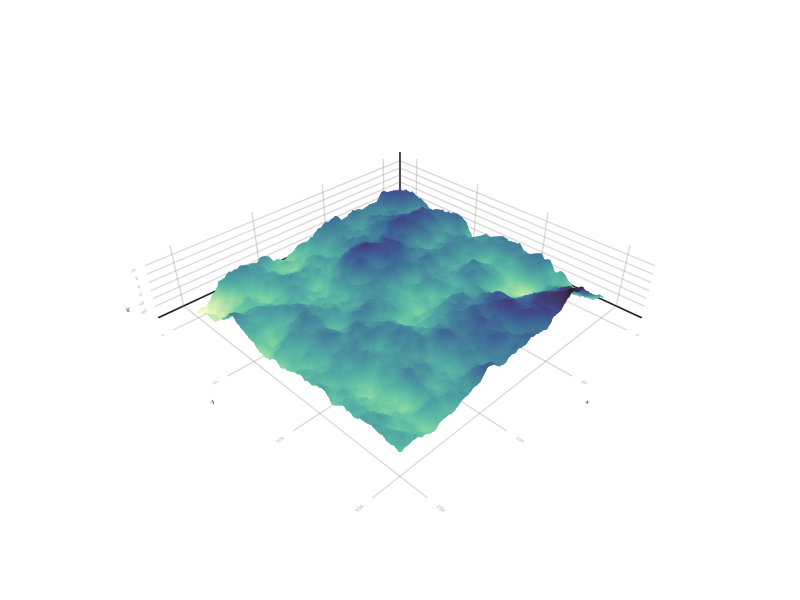

In [26]:
using SparseArrays
using LinearAlgebra
using GLMakie

# This example was provided by Moritz Schauer (@mschauer).

#=
Define the precision matrix (inverse covariance matrix)
for the Gaussian noise matrix.  It approximately coincides
with the Laplacian of the 2d grid or the graph representing
the neighborhood relation of pixels in the picture,
https://en.wikipedia.org/wiki/Laplacian_matrix
=#
function gridlaplacian(m, n)
    S = sparse(0.0I, n*m, n*m)
    linear = LinearIndices((1:m, 1:n))
    for i in 1:m
        for j in 1:n
            for (i2, j2) in ((i + 1, j), (i, j + 1))
                if i2 <= m && j2 <= n
                    S[linear[i, j], linear[i2, j2]] -= 1
                    S[linear[i2, j2], linear[i, j]] -= 1
                    S[linear[i, j], linear[i, j]] += 1
                    S[linear[i2, j2], linear[i2, j2]] += 1
                end
            end
        end
    end
    return S
end

# d is used to denote the size of the data
d = 150

 # Sample centered Gaussian noise with the right correlation by the method
 # based on the Cholesky decomposition of the precision matrix
data = 0.1randn(d,d) + reshape(
        cholesky(gridlaplacian(d,d) + 0.003I) \ randn(d*d),
        d, d
)

surface(data; shading=false, colormap = :deep)
surface(data; shading=false, colormap = :deep)

# YORP効果 @現在の軌道

In [17]:
thermo_params = ThermoParams(
    A_B   = 0.04,
    # A_B   = fill(0.04, shape.num_face),
    A_TH  = 0.0,
    k     = 0.1,
    # k     = fill(0.1, shape.num_face),
    ρ     = 1270.0,
    Cp    = 600.0,
    ϵ     = 1.,
    t_bgn = 0.0,
    t_end = spin.P * 10,
    Nt    = 721,
    z_max = 0.6,
    Nz    = 41,
    P     = spin.P,
);

In [18]:
@time τ̄ = run_YORP(shape, orbit, spin, thermo_params)

  0.198256 seconds (2 allocations: 160 bytes)


3-element Vector{Float64}:
  2.373866485982889
 -8.242316607010173
 -0.737357846794772

In [19]:
C = 4.039541372643629e16
ω̇, ωε̇, ωψ̇ = torque2rate(τ̄, spin, C)  # [deg/day²]

@show shapename
@show τ̄
@show ω̇, ωε̇, ωψ̇
@show YORP_timescale(3.5, 7.63262, ω̇);  # 3.5時間から7.6時間まで減速する時間スケール [yr]

shapename = "ryugu_v252_f500.obj"
τ̄ = [2.373866485982889, -8.242316607010173, -0.737357846794772]
(ω̇, ωε̇, ωψ̇) = (-2.109405521511298e-6, 6.818721818194578e-5, 6.045574839209878e-5)
YORP_timescale(3.5, 7.63262, ω̇) = 1.7347912669031401e6


In [15]:
##############################
#  　ryugu_v252_f500.obj     #
#　  t_end = orbit.T         #
##############################

# shapename = "ryugu_v252_f500.obj"
# τ̄ = [2.102139762963553, -1.9503690549955461, 0.10649756611585151]
# (ω̇, ωε̇, ωψ̇) = (-2.417553631012555e-6, 8.713420516412938e-6, 2.9006181145065934e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.514706707465591

##############################
#　  ryugu_test.obj          #
#　  t_end = spin.P * 10     #
##############################

# shapename = "ryugu_test.obj"
# τ̄ = [2.5306956279461983, -8.233792225809143, -0.7075406040546186]
# (ω̇, ωε̇, ωψ̇) = (-2.305600098551757e-6, 6.734927363385765e-5, 6.191331835096895e-5)
# YORP_timescale(3.5, 7.63262, ω̇) = 1.5871695526790055e6

# Yarkovsky効果 @現在の軌道

可視光の反射率を変えた時に、Yarkovksy drift rateがどれくらい変わるか

- 全球を白く塗る
- 全球を黒く塗る
- 半球を白く塗る 
- 半球を黒く塗る
- ある場所から半径R圏内を白く塗る
- ある場所から半径R圏内を黒く塗る

In [56]:
thermo_params = ThermoParams(
    A_B   = 0.04,
    # A_B   = fill(0.04, shape.num_face),
    A_TH  = 0.0,
    k     = 0.1,
    # k     = fill(0.1, shape.num_face),
    ρ     = 1270.0,
    Cp    = 600.0,
    ϵ     = 1.,
    t_bgn = 0.0,
    t_end = spin.P * 10,
    Nt    = 721,
    z_max = 0.6,
    Nz    = 41,
    P     = spin.P,
);

In [47]:
A_B = fill(0.04, shape.num_face)

selected = [center[1] > 0 for center in shape.facets.center]
A_B[selected] .= 1;

In [48]:
draw(shape; data=A_B)

GLMakie.Screen(...)

In [128]:
@time df = run_TPM(shape, orbit, spin, thermo_params)

  7.418221 seconds (8.44 k allocations: 239.047 KiB)


,t,u,ϕ,f_x,f_y,f_z,τ_x,τ_y,τ_z
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.468819,0.0,1.90212e-5,1.02542e-5,-1.40544e-6,-0.000528987,0.000193509,-9.0529e-5
2,381.631,0.46889,0.0872665,0.025544,0.0134518,-0.00159032,0.43984,-0.671912,-0.214646
3,763.262,0.46896,0.174533,0.0517712,0.0262483,-0.00324469,0.838556,-1.27199,-0.415826
4,1144.89,0.469031,0.261799,0.079729,0.0384986,-0.00504891,1.21761,-1.83762,-0.591526
5,1526.52,0.469101,0.349066,0.107593,0.049073,-0.00683545,1.56989,-2.37126,-0.749464
6,1908.15,0.469172,0.436332,0.134406,0.0575789,-0.00859515,1.90292,-2.85768,-0.869135
7,2289.79,0.469242,0.523599,0.159602,0.0639084,-0.010362,2.21003,-3.30579,-0.955768
8,2671.42,0.469313,0.610865,0.182878,0.0679558,-0.0119916,2.48997,-3.75187,-1.05517
9,3053.05,0.469383,0.698132,0.203958,0.0700833,-0.0136593,2.73357,-4.18318,-1.16108


In [28]:
# draw(shape; data=[flux.sun for flux in shape.facets.flux])
# draw(shape; data=[flux.rad for flux in shape.facets.flux])

In [23]:
using Distributed

In [52]:
# nworkers()
# nprocs()
# addprocs(4)
# rmprocs(2)

In [53]:
function f1()
    nheads = @distributed (+) for i = 1:200000000
        Int(rand(Bool))
    end
end

function f2()
    sum(Int(rand(Bool)) for i = 1:200000000)
end

f2 (generic function with 1 method)

In [54]:
@time f1()

  0.133683 seconds (44.48 k allocations: 2.289 MiB, 27.05% compilation time)


99998616

In [55]:
@time f2()

  0.243791 seconds


100010017

In [ ]:
# open("ryugu_test_temps.txt","w") do f
#     for smesh in shape.smeshes
#         println(f, smesh.Tz[begin], ", ", smesh.flux.sun, ", ", smesh.flux.scat, ", ", smesh.flux.rad)
#     end
# end

In [ ]:
# shapename = "ryugu_v252_f500.obj"

# Thermophysical parameters
# -------------------------
# A_B   : 0.04
# A_TH  : 0.0
# k     : 0.1
# ρ     : 1270.0
# Cₚ    : 600.0
# ϵ     : 1.0
# P     : 27477.432
# l     : 0.21287051812296282
# Γ     : 276.04347483684523
# Δt    : 0.01388888888888889
# t_bgn : 0.0
# t_end : 1490.1074827395094
# Nt    : 107288
# Δz    : 0.09395382778392625
# z_max : 2.8186148335177874
# Nz    : 31
# λ     : 0.12520702099737538

# 影 + 熱伝導
# τ̄ = [2.166292988343463, -1.8232052646633534, 0.12149914462601369]
# (ω̇, ωε̇, ωψ̇) = (-2.3559241586480615e-6, 7.198547956478111e-6, 2.903520943282301e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.5543304681988876

# 影 + 熱伝導 + 放射の再吸収
# τ̄ = [2.1867628755835007, -1.9130691894522611, 0.20980627031427984]
# (ω̇, ωε̇, ωψ̇) = (-3.3918521233894786e-6, 7.818508184547549e-6, 2.964269717748932e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.0796121314667426

# 影 + 熱伝導 + 放射の再吸収 + 散乱光による自己加熱
# τ̄ = [2.1865019814933127, -1.9132227674055484, 0.20659523329863488]
# (ω̇, ωε̇, ωψ̇) = (-3.358599466983103e-6, 7.826075560400724e-6, 2.9640911737278277e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.0903011021560833

# 影 + 熱伝導 + 放射の再吸収 + 散乱光による自己加熱 + 熱放射の再吸収による自己加熱
# τ̄ = [2.1769952611580217, -1.9075575309460082, 0.11690136500927037]
# (ω̇, ωε̇, ωψ̇) = (-2.4174445056821524e-6, 7.953525830274134e-6, 2.9524204264352846e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.5147750825077182

In [ ]:
# shapename = "ryugu_v752_f1500.obj"

# 影
# τ̄ = [3.3097974041391374, -1.7111464770712586, 0.12728322411992796]
# (ω̇, ωε̇, ωψ̇) = (-1.5003553780529698e-6, 9.426867138482173e-7, 3.9434066533743185e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 2.440678224718057

# 影 + 熱伝導 + 放射の再吸収 + 散乱光による自己加熱 + 熱放射の再吸収による自己加熱
# τ̄ = [2.165370019439715, -1.8680106417353224, 0.027423863292429056]
# (ω̇, ωε̇, ωψ̇) = (-1.433047521048842e-6, 7.77033687219021e-6, 2.923188963996669e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 2.5553128188466436

In [ ]:
# shapename = "ryugu_test.obj"

# 影
# τ̄ = [3.2623680861875415, -1.7632177354631766, 0.2112963317251145]
# (ω̇, ωε̇, ωψ̇) = (-2.484150619384357e-6, 1.5205017761112165e-6, 3.9220246601817255e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.4740993045985396

# 影 + 熱伝導 + 放射の再吸収 + 散乱光による自己加熱 + 熱放射の再吸収による自己加熱
# τ̄ = [2.1336218786667724, -1.878807112180092, 0.04045730505339008]
# (ω̇, ωε̇, ωψ̇) = (-1.6056650245345357e-6, 7.99631943219241e-6, 2.8978423396048164e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 2.280603142373392

In [ ]:
surf_temp = [T[begin] for T in Ts];

In [ ]:
plot(framestyle=:box, legend=false, size=(600,400))
plot!(xlims=(0, t_max/P))
plot!(ylims=(0, 400))

ts = collect(0:Δτ:t_max/P)
zs = collect(0:Δz:x_max/l)

plot!(ts, surf_temp)

xlabel!("Time / Rotation period")
ylabel!("Surface temperature [K]")

# View factorの計算時間

In [ ]:
plot(framestyle=:box, legend=false)


Ns = [500,      1500,     5932,     49152,      196608]    # 786432,     3145728
ts = [0.002659, 0.027669, 0.473278, 164.478600, 10829.774176]    # 3600*24*10, 3600*24*1000
plot!(Ns, ts, marker=(:circle))

plot!(xticks=[10^3, 10^4, 10^5])
plot!(xlabel="Number of facets")
plot!(ylabel="Calculation time [sec]")
plot!(xaxis=:log, yaxis=:log)

In [ ]:
# using FileIO, MeshIO
# mesh = load(shapepath)

In [ ]:
# using VTKView

In [ ]:
# using VTKDataTypes
# using VTKDataIO

In [ ]:
using VTKDataTypes
using WriteVTK
using PyCall
using LightXML
# using Iterators

@pyimport vtk.util.numpy_support as vtkns
@pyimport vtk as vtk
@pyimport numpy as np

In [ ]:
# include("/Users/masanorikanamaru/Documents/GitHub/VTKDataIO.jl/src/vtkreaders.jl")

In [ ]:
# read_vtk(vtkname)

In [ ]:
# read_static_vtk